In [13]:
import pandas as pd
# import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

base_path = "D:/manualCDmanagement/codes/Projects/VMs/skl algorithms/Logistic Regression/Diabetes.1/Storage"
file_name = "diabetes.csv"
file_path = os.path.join(base_path, file_name)

df = pd.read_csv(file_path) 



print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:

# # Exploratory Data Analysis (EDA)
# Check for missing values
# print(df.isnull().sum())

# # Summary statistics
print(round(df.describe(), 2))

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24     0.35  
std                        0.33   11.76     0.48  
min                        0.08   21.00     0.00  
25%                        0.24   24.00   

In [ ]:
# # Correlation matrix
# corr_matrix = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')

# ## Save image
# fig_name = "Correlation matrix.png"
# bp = base_path + "/Figures"
# save_to = os.path.join(bp, fig_name)
# # plt.savefig(save_to)
# plt.savefig(save_to, dpi=300, bbox_inches='tight')

# # plt.show()

In [23]:
# Split data into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities instead of classes
y_probs = model.predict_proba(X_test)[:, 1]

# Example of adjusting threshold to 0.7
threshold = 0.7
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate adjusted predictions
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
class_report_adjusted = classification_report(y_test, y_pred_adjusted)
roc_auc_adjusted = roc_auc_score(y_test, y_probs)

# Print evaluation metrics
print("Confusion Matrix (Adjusted):")
print(conf_matrix_adjusted)
print("\nClassification Report (Adjusted):")
print(class_report_adjusted)
print("\nROC AUC Score (Adjusted):", roc_auc_adjusted)

# Calculate accuracy with the adjusted predictions
accuracy = accuracy_score(y_test, y_pred_adjusted)
print("Accuracy (Adjusted) with Threshold {}: {:.2f}".format(threshold, accuracy))


Confusion Matrix (Adjusted):
[[85 14]
 [20 35]]

Classification Report (Adjusted):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154


ROC AUC Score (Adjusted): 0.8124885215794307
Accuracy (Adjusted) with Threshold 0.7: 0.78


In [ ]:
# Predict probabilities instead of classes
y_probs = model.predict_proba(X_test)[:, 1]

# Example of adjusting threshold to 0.3
threshold = 0.7
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate adjusted predictions
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
class_report_adjusted = classification_report(y_test, y_pred_adjusted)

# Print evaluation metrics
print("Confusion Matrix (Adjusted):")
print(conf_matrix_adjusted)
print("\nClassification Report (Adjusted):")
print(class_report_adjusted)

Confusion Matrix (Adjusted):
[[93  6]
 [28 27]]

Classification Report (Adjusted):
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        99
           1       0.82      0.49      0.61        55

    accuracy                           0.78       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.79      0.78      0.76       154



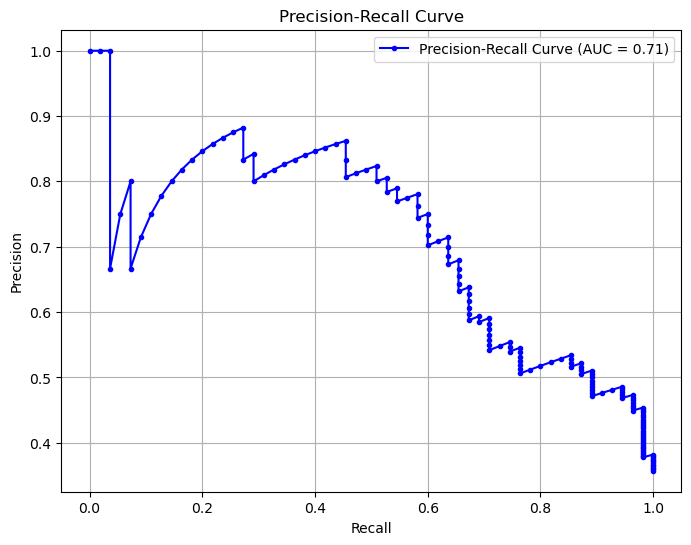

In [ ]:
# Compute precision-recall curve
precision, recall, threshold = precision_recall_curve(y_test, y_probs)
area_under_pr = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label=f'Precision-Recall Curve (AUC = {area_under_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix 0.7 Threshold')

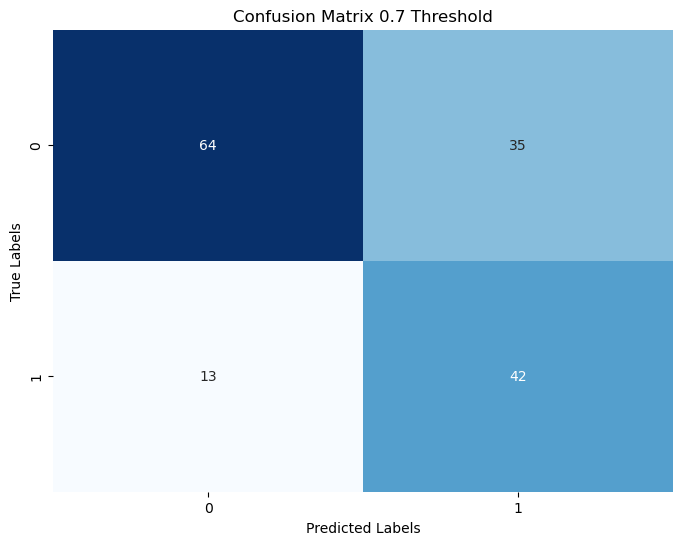

In [ ]:

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adjusted, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix 0.7 Threshold')

## Save image
# fig_name = "Confusion Matrix 0.7 Threshold.png"
# bp = base_path + "/Figures"
# save_to = os.path.join(bp, fig_name)
# plt.savefig(save_to)
# plt.savefig(save_to, dpi=300, bbox_inches='tight')

# plt.show()

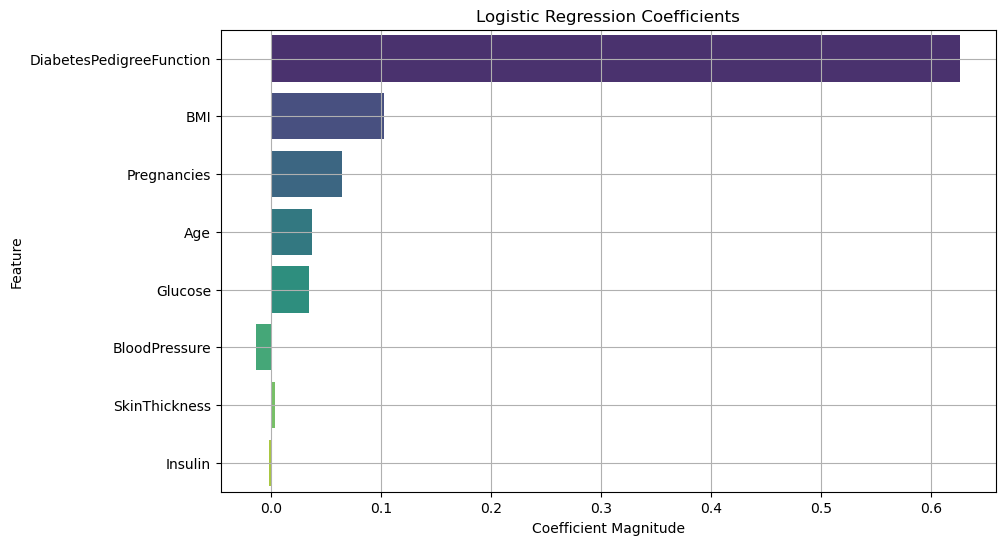

In [ ]:
coefficients = model.coef_[0]

feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()
